In [1]:
'''
Title:  Überprüfung erweitertes Modell
Author: Kaufmann Stefan
Date:   29.05.2023
'''

# Requirements

# python 3.10.6

import numpy as np
import matplotlib.pyplot as plt
import libopc as libs  
import casadi as cas
import control as ct
import control.optimal as obc

In [2]:
Nct = 50

def system_update(t, x, u,params):
    # Return the derivative of the state
    return libs.A_ex@x + libs.B_ex*u

def system_output(t, x, u,params):
    return x



# Define the vehicle steering dynamics as an input/output system
Quanser = ct.NonlinearIOSystem(
    system_update, system_output, states=5, name='Quanser',
    inputs=('u'), outputs=('i','phi','omega','phi2','omega2'))


u0 = np.array([0.]); x0_ = np.array([0., 0., 0., 0., 0.]); 
uf = np.array([0.]); xf_ = np.array([0, 0,0, np.pi/2., 0.]); 
Tf = 2

Q = np.diag([0,0,0,100,0])
S = Q*10
R = 0.0001

traj_cost = obc.quadratic_cost(Quanser, Q, R, x0=xf_, u0=uf)
term_cost = obc.quadratic_cost(Quanser, S, 0, x0=xf_)

constraints = [ obc.input_range_constraint(Quanser, [-6],[6])]

timepts = np.linspace(0, Tf, Nct, endpoint=True)

'''
result = obc.solve_ocp(
    Quanser, timepts, x0_, traj_cost, constraints,
    terminal_cost=term_cost, initial_guess=u0)

'''


'\nresult = obc.solve_ocp(\n    Quanser, timepts, x0_, traj_cost, constraints,\n    terminal_cost=term_cost, initial_guess=u0)\n\n'

In [7]:
x0_ = np.array([0., 0.5, 0, 0, 0])

time = np.linspace(0, 5, 100)

Text(0.5, 1.0, 'Eingang')

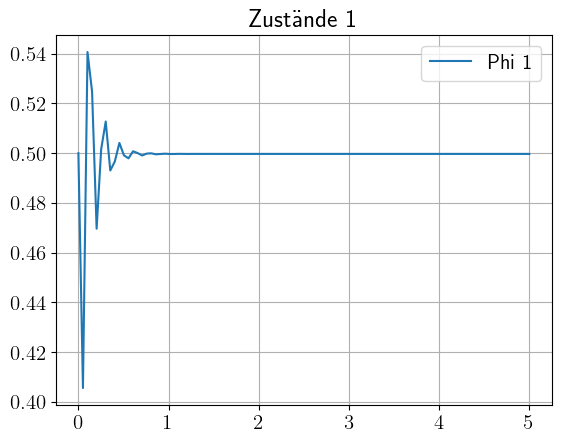

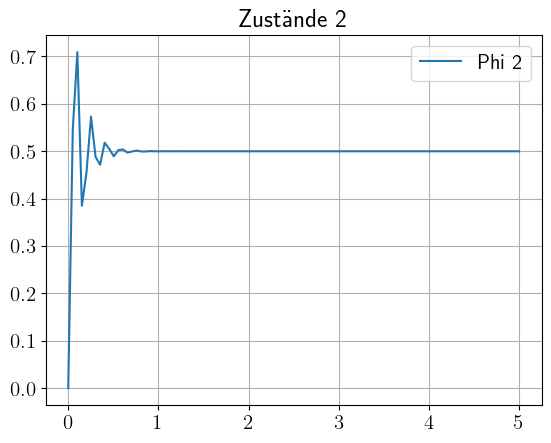

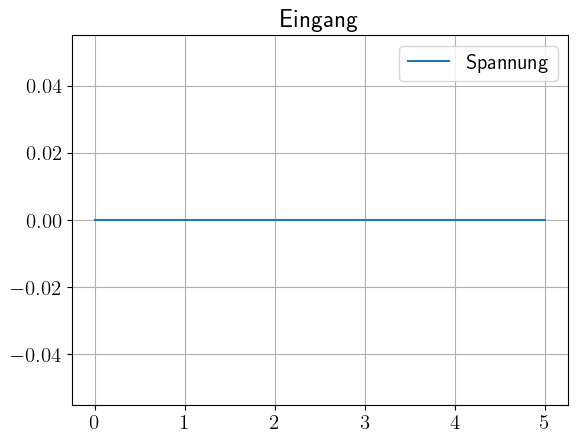

In [8]:
# Simulate the system dynamics (open loop)
#input = result.inputs*0; timepts = np.linspace(0, Tf, Nct, endpoint=True); t_ev=np.linspace(0, Tf, Nct)
input = time*0; timepts = time; t_ev=time
#input = U3[:-1] ;  timepts = np.linspace(0, Tend, N, endpoint=True); t_ev=np.linspace(0, Tend, N)
#input = U1[:-1] ;  timepts = np.linspace(0, T1, N, endpoint=True);  t_ev=np.linspace(0, T1, N)+

resp = ct.input_output_response(
    Quanser, timepts, input, x0_,
    t_eval=t_ev)
t_sim, y_sim, u_sim = resp.time, resp.outputs, resp.inputs


plt.figure(1)
#plt.plot(t_sim, y_sim[0], label = 'Strom')
plt.plot(t_sim, y_sim[1], label = 'Phi 1')
#plt.plot(t_sim, y_sim[2], label = 'Omega 1')
plt.title('Zustände 1')
plt.legend(loc = 'best')
plt.grid()
plt.figure(2)
plt.plot(t_sim, y_sim[3], label = 'Phi 2')
#plt.plot(t_sim, y_sim[4], label = 'Omega 2')
plt.grid()
plt.legend(loc = 'best')
plt.title('Zustände 2')

plt.figure(3)
plt.step(t_sim,u_sim[0], label = 'Spannung')
plt.grid()
plt.legend(loc = 'best')
plt.title('Eingang')
